In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB as mb
from sklearn.naive_bayes import GaussianNB as gb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
training_data=pd.read_csv("G:\my Assignemt\Assignment 12 Naive Bayes\SalaryData_Test.csv")
training_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [23]:
training_data.shape

(15060, 14)

In [24]:
training_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [25]:
training_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [26]:
#testing data
test_data=pd.read_csv("G:\my Assignemt\Assignment 12 Naive Bayes\SalaryData_Test.csv")

In [27]:
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [28]:
test_data.shape

(15060, 14)

In [29]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [30]:
test_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


<Axes: xlabel='Salary', ylabel='count'>

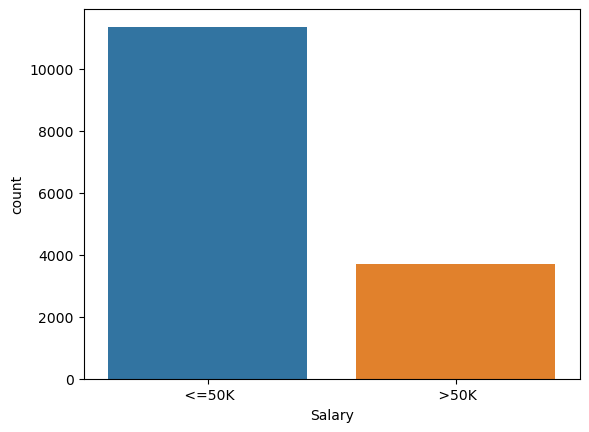

In [31]:
sns.countplot(x=training_data['Salary'])

<Axes: xlabel='Salary', ylabel='count'>

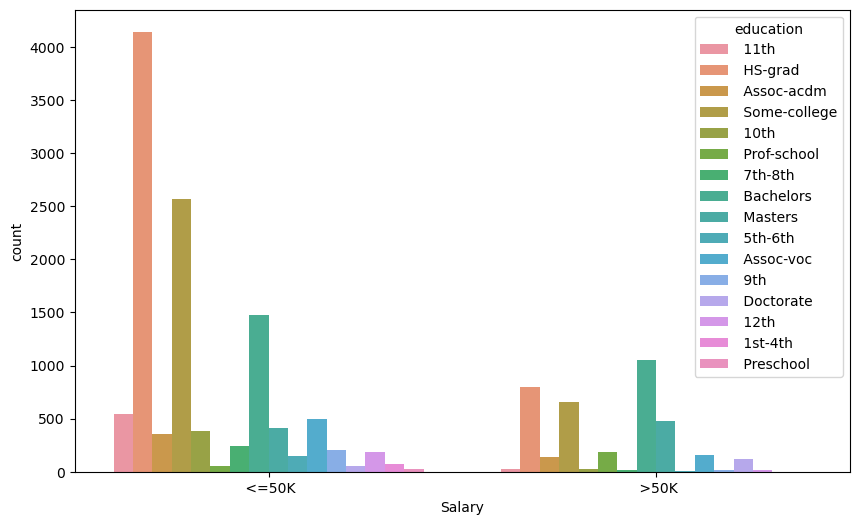

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x=training_data['Salary'],hue=training_data['education'])

<Axes: xlabel='Salary', ylabel='count'>

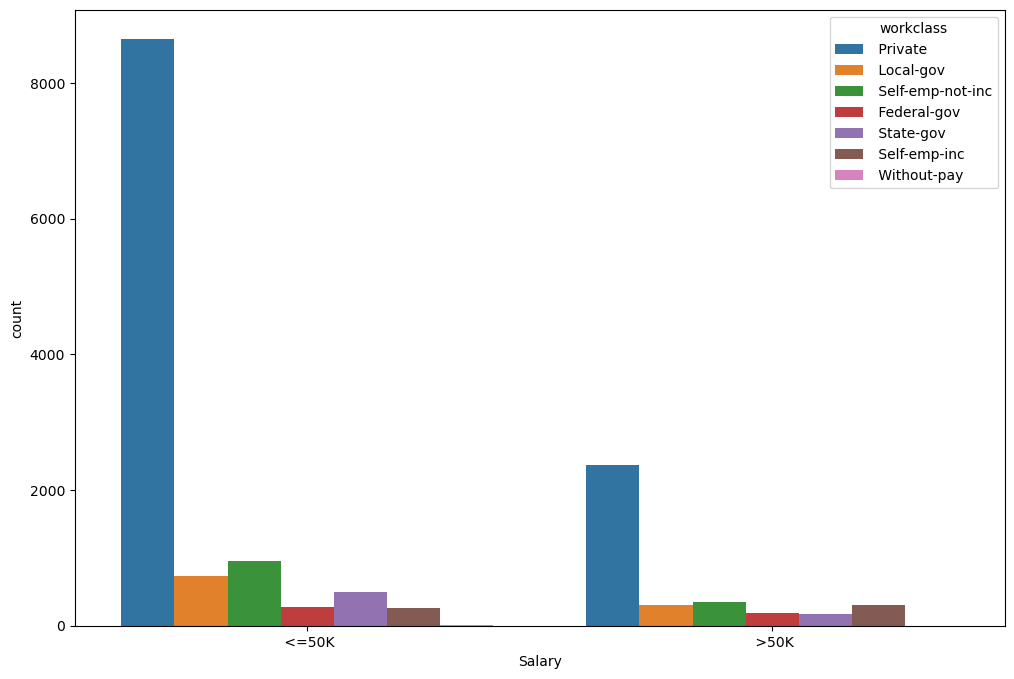

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(x=training_data["Salary"], hue=training_data['workclass'])

<Axes: xlabel='Salary', ylabel='count'>

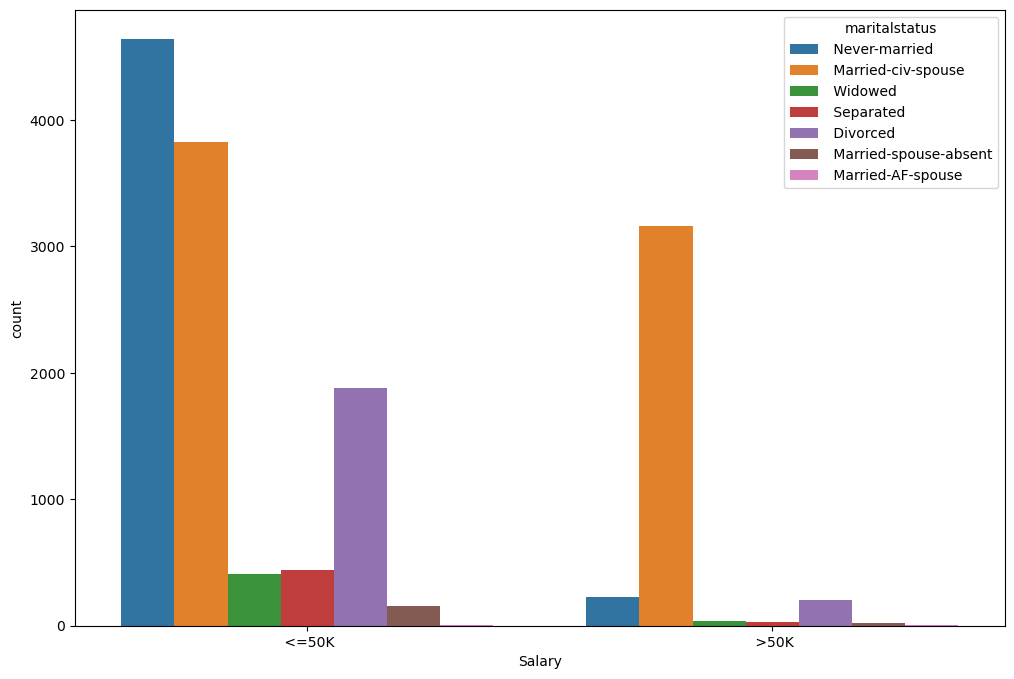

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(x=training_data['Salary'], hue=training_data['maritalstatus'])

<Axes: xlabel='Salary', ylabel='count'>

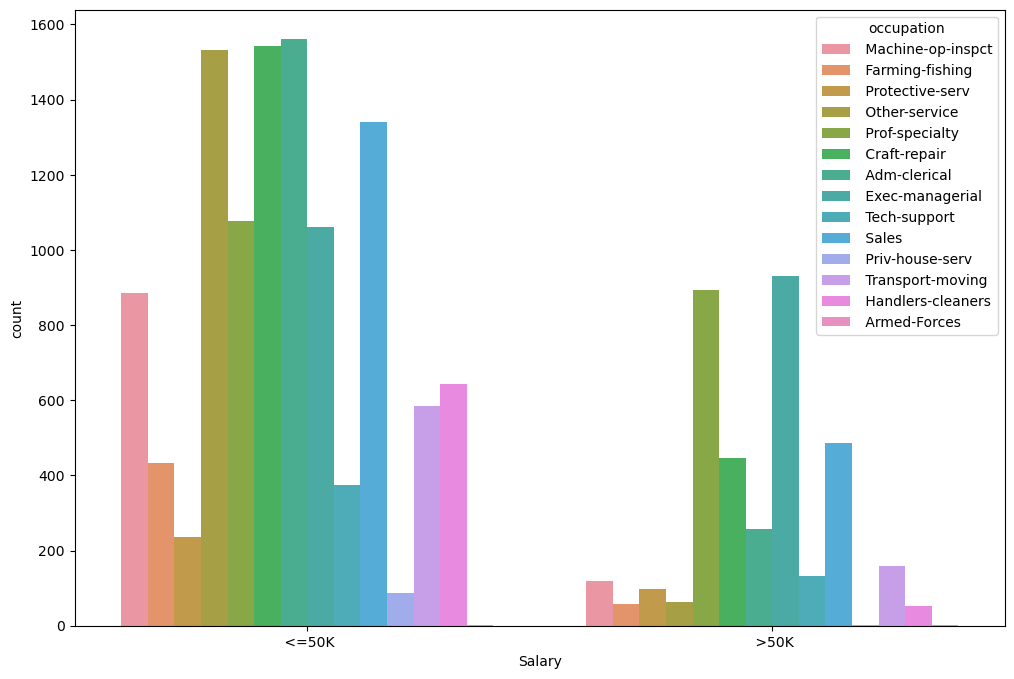

In [35]:
plt.figure(figsize=(12,8))
sns.countplot(x=training_data['Salary'], hue=training_data["occupation"])

In [36]:
le=LabelEncoder()
training_data['Salary']=le.fit_transform(training_data['Salary'])
test_data['Salary']=le.fit_transform(test_data['Salary'])

In [37]:
training_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [38]:
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [39]:
training_data = pd.get_dummies(data= training_data, columns= ['workclass','education','maritalstatus','occupation','relationship','race','sex','native'])
training_data

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,50,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,40,1,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,40,1,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,34,6,0,0,30,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
15056,39,13,0,0,36,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
15057,38,13,0,0,50,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
15058,44,13,5455,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [40]:
training_data.columns

Index(['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek',
       'Salary', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       ...
       'native_ Portugal', 'native_ Puerto-Rico', 'native_ Scotland',
       'native_ South', 'native_ Taiwan', 'native_ Thailand',
       'native_ Trinadad&Tobago', 'native_ United-States', 'native_ Vietnam',
       'native_ Yugoslavia'],
      dtype='object', length=103)

In [41]:
test_data=pd.get_dummies(data=test_data,columns= ['workclass','education','maritalstatus','occupation','relationship','race','sex','native'])
test_data

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,50,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,40,1,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,40,1,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,34,6,0,0,30,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
15056,39,13,0,0,36,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
15057,38,13,0,0,50,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
15058,44,13,5455,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


<Figure size 1000x700 with 0 Axes>

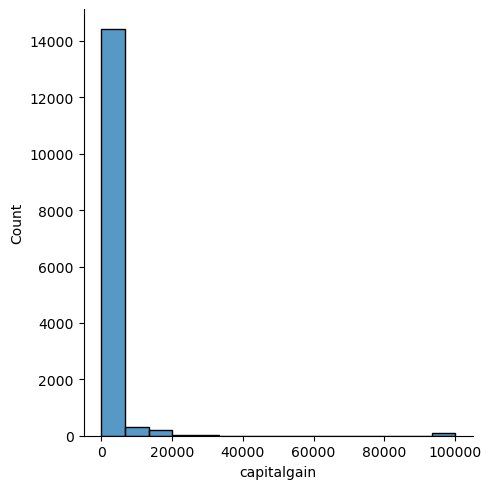

In [42]:
plt.figure(figsize=(10,7))
sns.displot(training_data['capitalgain'])
plt.show()

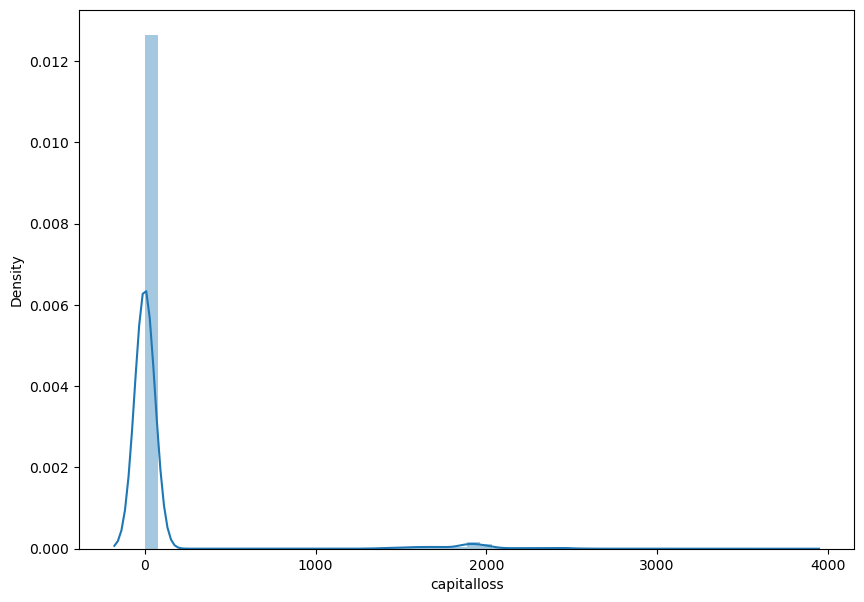

In [43]:
plt.figure(figsize=(10,7))
sns.distplot(training_data['capitalloss'])
plt.show()

In [44]:
x_train = training_data.drop(labels= 'Salary', axis = 1)
y_train = training_data[['Salary']]

In [45]:
x_train.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,50,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,34,6,0,0,30,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [46]:
y_train.head()

,Salary
0,0
1,0
2,1
3,1
4,0


In [47]:
x_test=test_data.drop(labels='Salary',axis=1)
y_test=test_data["Salary"]

In [48]:
x_test.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,50,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,34,6,0,0,30,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [49]:
y_test.head()

0    0
1    0
2    1
3    1
4    0
Name: Salary, dtype: int32

In [50]:
train_model=gb()
train_model.fit(x_train,y_train)

GaussianNB()

In [51]:
y_train_pred=train_model.predict(x_train)

In [52]:
accuracy_score(y_train,y_train_pred)

0.8057768924302788

In [53]:
confusion_matrix(y_train,y_train_pred)

array([[9144, 2216],
       [ 709, 2991]], dtype=int64)

In [54]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     11360
           1       0.57      0.81      0.67      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.81      0.77     15060
weighted avg       0.84      0.81      0.82     15060



In [55]:
y_test_pred=train_model.predict(x_test)

In [56]:
accuracy_score(y_test,y_test_pred)

0.8057768924302788

In [57]:
confusion_matrix(y_test,y_test_pred)

array([[9144, 2216],
       [ 709, 2991]], dtype=int64)

In [58]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     11360
           1       0.57      0.81      0.67      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.81      0.77     15060
weighted avg       0.84      0.81      0.82     15060



In [59]:
print('training data accurancy score is: ',accuracy_score(y_train,y_train_pred))
print('testing data accurancy score is: ',accuracy_score(y_test,y_test_pred))

training data accurancy score is:  0.8057768924302788
testing data accurancy score is:  0.8057768924302788


In [60]:
mb_model=mb()
mb_model.fit(x_train,y_train)

MultinomialNB()

In [61]:
y_mb_train=mb_model.predict(x_train)

In [62]:
accuracy_score(y_train,y_mb_train)

0.7749667994687915

In [63]:
confusion_matrix(y_train,y_mb_train)

array([[10891,   469],
       [ 2920,   780]], dtype=int64)

In [64]:
print(classification_report(y_train,y_mb_train))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



In [65]:
y_test_mb=mb_model.predict(x_test)

In [66]:
accuracy_score(y_test,y_test_mb)

0.7749667994687915

In [67]:
print(classification_report(y_test,y_test_mb))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



In [68]:
print('training accurancy of Multinominal Naive Bayes model: ',accuracy_score(y_train,y_mb_train))
print('testing accurancy of Multinominal Naive Bayes model: ',accuracy_score(y_test,y_test_mb))

training accurancy of Multinominal Naive Bayes model:  0.7749667994687915
testing accurancy of Multinominal Naive Bayes model:  0.7749667994687915
